# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab we will use the titanic dataset to see the impact of tree pruning and hyper parameter tuning on the predictive performance of decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. In this lab, we shall work with the Titanic dataset and see how we can tweak different hyper parameters for optimal pruning of the trees. 

## Objectives
You will be able to:
- Demonstrate how pruning is performed for decision trees 
- Understand and explain the role of different Decision tree hyperparameters
- Select the best values for chosen hyperparameters and monitor the improvement in performance

## Import necessary libraries

Let's first import the libraries you would need for this lab. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')

## Read the Titanic Dataset

In the repo, we have made titanic dataset , all cleaned up and pre-processed for you, so that you can focus on pruning and optimization. The features set is available as `featues.csv` and target variable as `target.csv`. 
- Load these files into separate dataframes below.
- Check the shape for consistency and the view the head 

In [7]:
# Load features and target variables
X = pd.read_csv('features.csv')
y = pd.read_csv('target.csv')


This is great. Now that we have our x (feat) and y(target), we can go ahead and make a split necessary for supervised learning.

## Create a 70/30 Train/Test split
- Using features and target variables above , create a 70/30 split using 

In [8]:
# Create a 70/30 split for given X and y 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

# Your code here 

So now we have our data ready for training, lets first train a DT classifier with this data
## Train a Vanilla Classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Create a decision tree instance
- Fit a DT classifier with training dataset using all default settings for hyperparameters i.e. we don't change any parameter.
- Set the impurity criteria to "entropy".

In [10]:
# Train the classifier using training data 
tree = DecisionTreeClassifier(random_state =10, criterion='entropy')
tree.fit(X_train, y_train)

# Your code here 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under curve) to check the predictive performance

In [14]:
# Make predictions using test set 
y_preds = tree.predict(X_test)



# Check the AUC of predictions
def metrics(labels,predictions):
   # Check the AUC for predictions
        false_positive_rate, true_positive_rate, thresholds = roc_curve(labels, predictions)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        print("\nAUC is :{0}".format(round(roc_auc,2)))

metrics(y_test,y_preds)


AUC is :0.75


## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree. 
- Create an array for for depth values ranging from 1 - 32. 
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

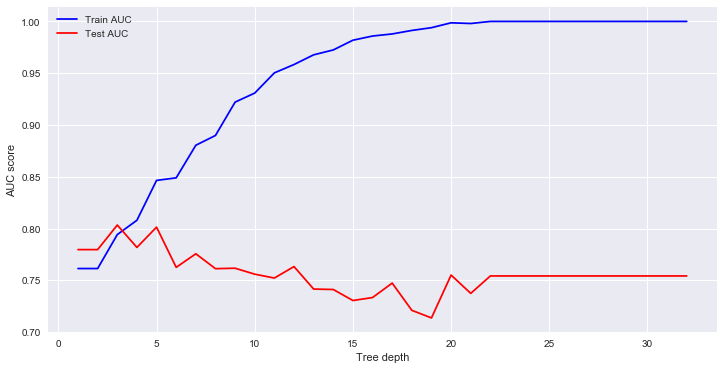

32

In [39]:
# Identify the optimal tree depth for given data

depths_array = np.linspace(1, 32, 32, endpoint=True)
auc_test = []
auc_train = []

for depth in depths_array:
    #training results
    tree = DecisionTreeClassifier(random_state =10, criterion='entropy',max_depth = depth)
    tree.fit(X_train, y_train)
    train_prediction = tree.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_prediction)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    auc_train.append(roc_auc)
    
    #testing result
    test_prediction = tree.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,test_prediction)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    auc_test.append(roc_auc)


plt.figure(figsize=(12,6))
plt.plot(depths_array, auc_train, 'b', label='Train AUC')
plt.plot(depths_array, auc_test, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()



In [ ]:
#The right depth of the tree is 3

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree. 
- Create an array for for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

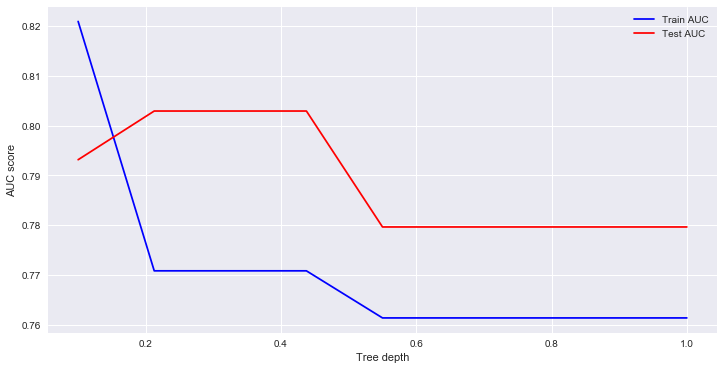

In [41]:
# Identify the optimal min-samples-split for given data
min_split_array = np.linspace(0.1, 1, 9, endpoint=True)
auc_test = []
auc_train = []

for minimum_split in min_split_array:
    #training results
    tree = DecisionTreeClassifier(random_state =10, criterion='entropy',min_samples_split= minimum_split)
    tree.fit(X_train, y_train)
    train_prediction = tree.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_prediction)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    auc_train.append(roc_auc)
    
    #testing result
    test_prediction = tree.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,test_prediction)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    auc_test.append(roc_auc)


plt.figure(figsize=(12,6))
plt.plot(min_split_array, auc_train, 'b', label='Train AUC')
plt.plot(min_split_array, auc_test, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()


# Your code here 

In [171]:
# Minimum number of samples per split around 15%


## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree. 
- Create an array for for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

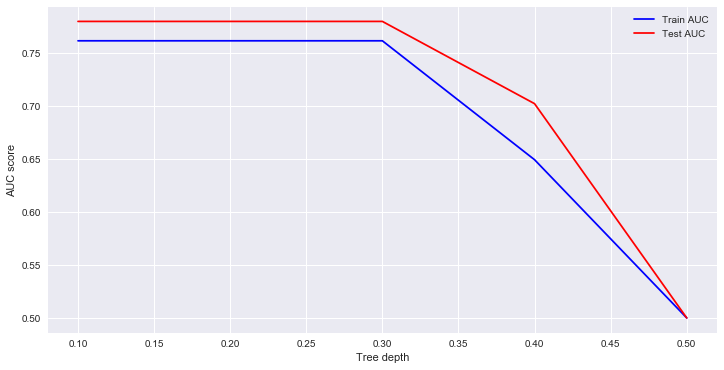

In [43]:
# Calculate the optimal value for minimum sample leafs
min_leaf_array = np.linspace(0.1, 0.5, 5, endpoint=True)
auc_test = []
auc_train = []

for minimum_leaf in min_leaf_array:
    #training results
    tree = DecisionTreeClassifier(random_state =10, criterion='entropy',min_samples_leaf= minimum_leaf)
    tree.fit(X_train, y_train)
    train_prediction = tree.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_prediction)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    auc_train.append(roc_auc)
    
    #testing result
    test_prediction = tree.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,test_prediction)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    auc_test.append(roc_auc)


plt.figure(figsize=(12,6))
plt.plot(min_leaf_array, auc_train, 'b', label='Train AUC')
plt.plot(min_leaf_array, auc_test, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()
# Your code here 

In [44]:
# Minimum samples per leaf should be 30%


## Maximum Features

Now check for the best `max_features` parameter value for our decision tree. 
- Create an array for for `max_features` values ranging from 1 - 12 (1 features vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

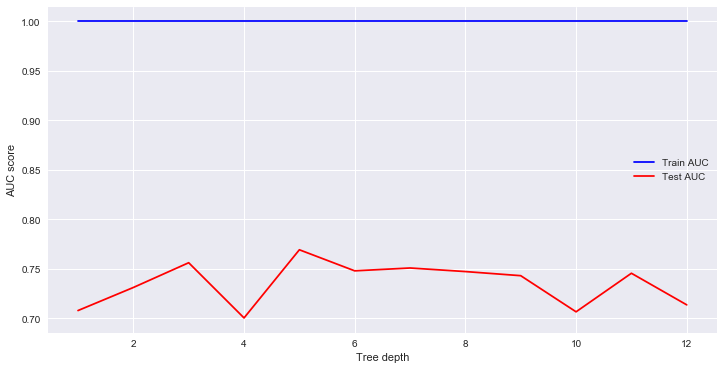

In [47]:
# Find the best value for optimal maximum feature size
max_f_array = list(range(1,X_train.shape[1]))
auc_test = []
auc_train = []

for features in max_f_array:
    #training results
    tree = DecisionTreeClassifier(random_state =10, criterion='entropy',max_features= features)
    tree.fit(X_train, y_train)
    train_prediction = tree.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_prediction)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    auc_train.append(roc_auc)
    
    #testing result
    test_prediction = tree.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,test_prediction)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    auc_test.append(roc_auc)


plt.figure(figsize=(12,6))
plt.plot(max_f_array, auc_train, 'b', label='Train AUC')
plt.plot(max_f_array, auc_test, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

# Your code here 

In [178]:
# Your observations here 



## Re-train the classifier with chosen values

So now we shall use the best values from each training phase above and feed it back to our classifier and see if have any improvement in predictive performance. 

- Train the classifier with optimal values identified 
- compare the AUC with vanilla DT AUC 
- Interpret the results of comparison

In [50]:
# train a classifier with optimal values identified above
tree = DecisionTreeClassifier(random_state =10, criterion='entropy',max_depth = 3,min_samples_split= 0.6,min_samples_leaf=0.3)
tree.fit(X_train, y_train)


y_preds = tree.predict(X_test)



metrics(y_test,y_preds)


AUC is :0.78


In [ ]:
# You observations here 


In the next section, we shall talk about hyper-parameter tuning using a technique called "grid-search" to make this process even more granular and decisive. 


## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid over fitting and increasing the generalization capabilities of the classifier. For the Titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 